In [2]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Creating our sentences to train the word vectors

In [4]:
TextCorpus  = ["I like Machine learning",
               "PGAM has a good ML program",
               "UT TX has good faculty",
               "professor A is that good faculty",
               "I like ML"
]

In [5]:
text_tokens = [sent.split() for sent in TextCorpus]
text_tokens[:2]

[['I', 'like', 'Machine', 'learning'],
 ['PGAM', 'has', 'a', 'good', 'ML', 'program']]

#### Training the word vectors

In [6]:
model = Word2Vec(text_tokens,min_count=1)

In [7]:
model.wv['ML']

array([ 0.00393187, -0.00441841,  0.00336012, -0.00289895, -0.00361418,
        0.00452282,  0.00012504, -0.00125611,  0.00054152,  0.0039671 ,
       -0.00204946,  0.00451079,  0.00130186,  0.00056118,  0.0046137 ,
       -0.00486615,  0.00062221,  0.00372938, -0.00160419,  0.00387281,
        0.00339515,  0.00248935,  0.00043701, -0.00153362, -0.00492154,
        0.00467638, -0.00151259, -0.00269917, -0.00088154, -0.00165638,
        0.00496401,  0.00296144, -0.00308373, -0.00434702,  0.00222743,
        0.0020859 ,  0.00159709, -0.00362089,  0.00148063,  0.0045369 ,
        0.00427724, -0.00017331,  0.00438847, -0.00257889,  0.00020561,
        0.00230332, -0.00272015,  0.00233624,  0.00239662,  0.00406365,
        0.00494455, -0.00392717,  0.00360335, -0.00422126,  0.00340597,
        0.00025718, -0.00011456, -0.00107163,  0.00107791, -0.0009445 ,
       -0.00245206, -0.00271988,  0.00152714, -0.0005943 ,  0.00486545,
       -0.00016927, -0.0028674 ,  0.00332218,  0.00090884,  0.00

In [8]:
len(model.wv['ML'])

100

Similarity between word vectors is measures using Cosine similarity

In [9]:
model.wv.most_similar("faculty",topn=5)

[('has', 0.1575240194797516),
 ('TX', 0.12230820208787918),
 ('is', 0.1023259162902832),
 ('I', 0.09490247070789337),
 ('program', 0.08471820503473282)]

### Training our word vectors on the text8 corpus
Cleaned Wikipedia text, compressed to 100MB

#### Importing the raw text file

In [10]:
sentences = word2vec.Text8Corpus('text8')# text8 cna be downloaded from http://mattmahoney.net/dc/text8.zip

#### Using all default parameters

In [11]:
model = Word2Vec(sentences)

In [12]:
q = model['queen']

C:\Users\shams\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [13]:
model.most_similar('girl')

C:\Users\shams\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('baby', 0.7990880012512207),
 ('kid', 0.7896857857704163),
 ('woman', 0.7602214813232422),
 ('blonde', 0.7559003829956055),
 ('boy', 0.7532691955566406),
 ('girls', 0.7191653251647949),
 ('lucy', 0.708946943283081),
 ('cat', 0.7043458819389343),
 ('duck', 0.6951346397399902),
 ('rabbit', 0.6899293065071106)]

In [14]:
print(model.most_similar(positive=['boy','queen'],negative=['girl'], topn=1))

[('king', 0.6451611518859863)]


C:\Users\shams\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [15]:
from sklearn.manifold import TSNE
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

In [16]:
def tsne_plot(model):
    labels = []
    wordvecs = []
    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    tsne_model = TSNE(perplexity=3, n_components=2,init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)
    
    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(2,2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

C:\Users\shams\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


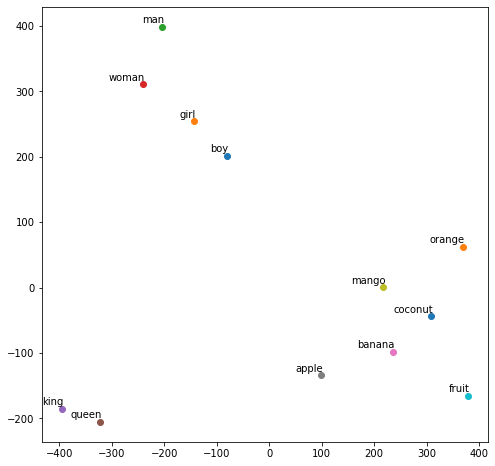

In [17]:
tsne_plot(model)

In [18]:
model.wv.most_similar("happiness")

[('humanity', 0.8187832236289978),
 ('pleasure', 0.7597636580467224),
 ('perfection', 0.7569164037704468),
 ('salvation', 0.7560180425643921),
 ('mankind', 0.755362868309021),
 ('goodness', 0.7503138780593872),
 ('compassion', 0.7372018694877625),
 ('striving', 0.7341852784156799),
 ('righteousness', 0.7315574288368225),
 ('desires', 0.7311034202575684)]

In [19]:
model.wv.most_similar("queen")

[('princess', 0.7823585867881775),
 ('prince', 0.748436450958252),
 ('elizabeth', 0.7452001571655273),
 ('king', 0.7270873785018921),
 ('consort', 0.6760820746421814),
 ('mary', 0.6506506204605103),
 ('crown', 0.6375426054000854),
 ('diana', 0.6356901526451111),
 ('regent', 0.6289559006690979),
 ('isabella', 0.6104800701141357)]

#### Semantic regularities captured in word embeddings

In [20]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6707719564437866),
 ('emperor', 0.6254715919494629),
 ('prince', 0.6140930652618408),
 ('empress', 0.6072925329208374),
 ('princess', 0.6036636829376221)]

In [21]:
model.wv.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

[('heroine', 0.6687352061271667),
 ('legendary', 0.6539583206176758),
 ('protagonist', 0.629598081111908),
 ('villain', 0.6085561513900757),
 ('warrior', 0.6054842472076416)]

### Visualizing these word vectors

In [22]:
X = model.wv[model.wv.vocab]

##### We'll use PCA to reduce and visualize in 2 dimensions

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Randomly select 100 words

In [25]:
import random
random.seed(2)

In [26]:
ind = random.sample(range(0,len(X)),100)
result_random = result[ind]
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]

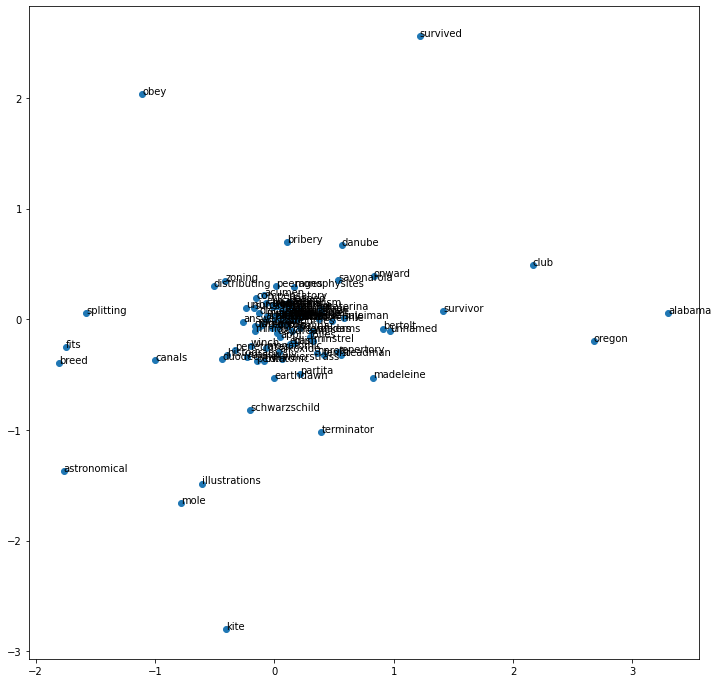

In [27]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

## Effect of vector dimension

#### Reducing the length to 50

In [28]:
model = Word2Vec(sentences, size=50)

In [29]:
model.wv.most_similar("money")

[('profits', 0.8023641109466553),
 ('credit', 0.7839184999465942),
 ('funds', 0.7633928656578064),
 ('payment', 0.7432807683944702),
 ('buying', 0.7414658665657043),
 ('payments', 0.7227416634559631),
 ('royalties', 0.7226705551147461),
 ('debts', 0.7201098203659058),
 ('compensation', 0.7194818258285522),
 ('pay', 0.7161986827850342)]

In [30]:
model.wv.most_similar("queen", topn=5)

[('princess', 0.8160459399223328),
 ('elizabeth', 0.8069237470626831),
 ('prince', 0.7848668694496155),
 ('king', 0.770031213760376),
 ('consort', 0.747631847858429)]

In [31]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('empress', 0.7560046911239624),
 ('son', 0.7527749538421631),
 ('queen', 0.7096380591392517),
 ('viii', 0.6945804357528687),
 ('consul', 0.6931684017181396)]

#### Inreasing vector length to 300

In [32]:
model = word2vec.Word2Vec(sentences, size = 300)

In [33]:
model.wv.most_similar("money")

[('profits', 0.7082163691520691),
 ('payment', 0.6816314458847046),
 ('credit', 0.6765713095664978),
 ('payments', 0.6549445390701294),
 ('buying', 0.6480629444122314),
 ('cash', 0.6393184661865234),
 ('taxes', 0.6363804936408997),
 ('funds', 0.6313327550888062),
 ('tax', 0.6273378133773804),
 ('royalties', 0.6260689496994019)]

In [34]:
model.wv.most_similar("queen")

[('elizabeth', 0.7571253776550293),
 ('princess', 0.7294096350669861),
 ('prince', 0.7095794677734375),
 ('consort', 0.668662428855896),
 ('king', 0.6664098501205444),
 ('regent', 0.6458760499954224),
 ('duchess', 0.6406625509262085),
 ('victoria', 0.6353797912597656),
 ('crown', 0.6330767869949341),
 ('mary', 0.6327143311500549)]

In [35]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6451364159584045),
 ('empress', 0.555202841758728),
 ('isabella', 0.5459343194961548),
 ('throne', 0.5455340147018433),
 ('prince', 0.5423969626426697)]

## Skip gram vs CBOW

Simply put, the CBOW model learns the embedding by predicting the current word based on its context. The skip-gram model learns by predicting the surrounding words given a current word.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png)

#### Using Skipgram method

In [36]:
model_sg = word2vec.Word2Vec(sentences, size=100,sg=1)

In [37]:
model_sg.wv.most_similar("money")

[('dividends', 0.7894406318664551),
 ('repay', 0.7538312673568726),
 ('credit', 0.7525813579559326),
 ('payments', 0.7435339689254761),
 ('recoup', 0.7373378276824951),
 ('taxes', 0.7366256713867188),
 ('dues', 0.7289210557937622),
 ('debts', 0.7280930280685425),
 ('pay', 0.7270780205726624),
 ('specie', 0.7252786159515381)]

In [38]:
model_sg.wv.most_similar("queen")

[('elizabeth', 0.8001238703727722),
 ('consort', 0.7506184577941895),
 ('highness', 0.748704195022583),
 ('king', 0.7357900142669678),
 ('prince', 0.7260781526565552),
 ('margrethe', 0.7259289026260376),
 ('isabella', 0.7111678719520569),
 ('princess', 0.7061107754707336),
 ('regnant', 0.7043166160583496),
 ('hrh', 0.6982150077819824)]

In [39]:
model_sg.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6769178509712219),
 ('consort', 0.6317269802093506),
 ('viii', 0.621690571308136),
 ('jadwiga', 0.6200542449951172),
 ('sigismund', 0.616452693939209)]

In [40]:
model_sg.wv.most_similar("meandering")

[('wadis', 0.9066961407661438),
 ('basaltic', 0.9004149436950684),
 ('troughs', 0.899204671382904),
 ('undulating', 0.8990179300308228),
 ('sinuous', 0.8930817246437073),
 ('uplifted', 0.8884227275848389),
 ('watercourses', 0.8875988721847534),
 ('featureless', 0.8833255767822266),
 ('outwash', 0.8830329775810242),
 ('abyssal', 0.8820391893386841)]

#### Learning:
In CBOW the vectors from the context words are averaged before predicting the center word. In skip-gram there is no averaging of embedding vectors. It seems like the model can learn better representations for the rare words when their vectors are not averaged with the other context words in the process of making the predictions. 

## Word vectors trained on different contexts
 - We'll load different corpora, from different contexts and see how the embeddings vary
 - The text8 corpus is wikipedia pages, while Brown corpus is from 15 different topics, and movie reviews are from IMDB

In [41]:
from nltk.corpus import brown, movie_reviews
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\shams\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [42]:
model_brown = Word2Vec(brown.sents(), sg=1)
model_movie = Word2Vec(movie_reviews.sents(), sg=1, window=5)

In [43]:
model_sg.wv.most_similar('money', topn=5)

[('dividends', 0.7894406318664551),
 ('repay', 0.7538312673568726),
 ('credit', 0.7525813579559326),
 ('payments', 0.7435339689254761),
 ('recoup', 0.7373378276824951)]

In [44]:
model_brown.wv.most_similar('money', topn=5)

[('job', 0.8465257287025452),
 ('care', 0.8435542583465576),
 ('friendship', 0.8404434323310852),
 ('permission', 0.8280141353607178),
 ('chances', 0.8240001201629639)]

In [45]:
model_movie.wv.most_similar('money', topn=5)

[('cash', 0.7432961463928223),
 ('risk', 0.7189121246337891),
 ('paid', 0.7148017287254333),
 ('ransom', 0.7108563780784607),
 ('pay', 0.6836309432983398)]

 
I hope it’s pretty clear from the above examples that the semantic similarity of words can vary greatly depending on the textual context. 